In [625]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

plt.style.use('fivethirtyeight')

In [626]:
# Read the data
FBS_PATH = Path('assets','fbs_1961_2013.csv')
fbs = pd.read_csv(FBS_PATH)

In [630]:
#Getting subsets of the main data frame for one particular commodity (Vegetables)
fbs_veg_rows = fbs.loc[:,'Item'].isin(["Vegetables"])
fbs_veg = fbs.loc[fbs_veg_rows,:]
fbs_us_rows = fbs.loc[:,'Country'].isin(["United States of America"])
fbs_ca_rows = fbs.loc[:,'Country'].isin(["Canada"])
fbs_us_veg = fbs_veg.loc[fbs_us_rows,:]
fbs_ca_veg = fbs_veg.loc[fbs_ca_rows,:]

In [614]:
# Doing some checks on the data
fbs_us_veg.isnull().sum()
fbs_us_veg.dtypes
fbs_us_veg.describe()

,Country Code,Item Code,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Losses,Production,Stock Variation,Year,Population
count,53.0,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,231.0,2918.0,30204.037736,2251.867925,140.962264,28348.886792,3185.301887,1714.264151,29270.735849,0.000000,1987.000000,250836.169811
std,0.0,0.0,7653.945734,1637.458690,41.677315,7153.519673,2534.047580,464.028188,6900.919786,75.492486,15.443445,38955.176704
min,231.0,2918.0,18612.000000,533.000000,88.000000,17462.000000,464.000000,1052.000000,18698.000000,-192.000000,1961.000000,189276.000000
25%,231.0,2918.0,23843.000000,796.000000,101.000000,22443.000000,1046.000000,1307.000000,23593.000000,0.000000,1974.000000,217467.000000
50%,231.0,2918.0,28654.000000,1190.000000,129.000000,26981.000000,2449.000000,1561.000000,27284.000000,0.000000,1987.000000,246833.000000
75%,231.0,2918.0,38138.000000,3936.000000,189.000000,35720.000000,5005.000000,2236.000000,35862.000000,0.000000,2000.000000,284594.000000
max,231.0,2918.0,41666.000000,5538.000000,203.000000,39116.000000,8967.000000,2372.000000,39798.000000,452.000000,2013.000000,320051.000000


In [615]:
# Make an instance of the LinearRegression class.
lr_fbs = LinearRegression()

#Get all the features to use in our model
feature_cols_veg = ['Population','Food','Export Quantity','Import Quantity']

lr_us_veg = LinearRegression()

X_veg = fbs_us_veg.loc[:,feature_cols_veg]
y_veg = fbs_us_veg.loc[:,'Production']

lr_us_veg.fit(X_veg, y_veg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [616]:
fbs_us_veg.loc[:,'predictions'] = lr_us_veg.predict(X_veg)
fbs_us_veg.tail()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Losses,Production,Stock Variation,Year,Population,predictions
587,231,United States of America,2918,Vegetables,40195,4265,195,37686,7362,2316,37289,-192,2009,309492,37074.076837
599,231,United States of America,2918,Vegetables,40015,4498,200,37496,8137,2320,36535,-158,2010,312247,36332.183244
611,231,United States of America,2918,Vegetables,39119,5057,192,36650,8371,2281,35762,43,2011,314912,35778.381662
623,231,United States of America,2918,Vegetables,40010,5094,181,37515,8525,2318,36557,22,2012,317505,36582.996063
635,231,United States of America,2918,Vegetables,38938,5538,193,36472,8967,2278,35058,452,2013,320051,35487.463761


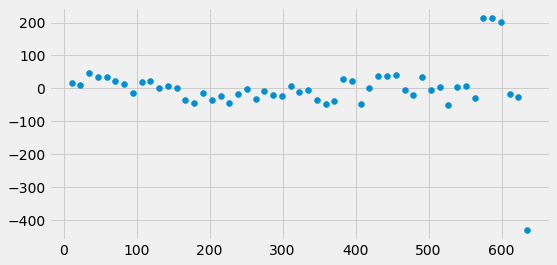

In [617]:
# Compare predicted values to actual
fig, ax = plt.subplots(figsize=(8,4))
residuals = y_veg - fbs_us_veg.loc[:, 'predictions']
ax.scatter(x=fbs_us_veg.index, y=residuals);

In [618]:
print(lr_us_veg.intercept_)
print(lr_us_veg.coef_)

257.77305190465995
[-0.00199972  1.07003493  1.05951772 -1.0063811 ]


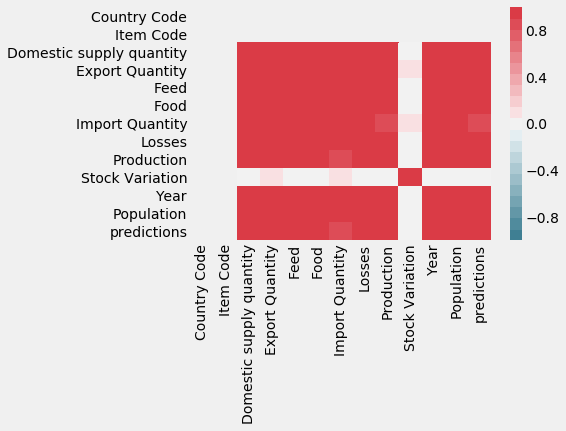

In [619]:
sns.heatmap(fbs_us_veg.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(220,10,n=21))

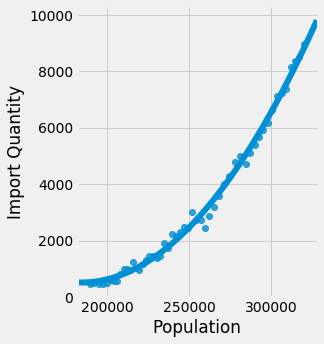

In [620]:
# Checking some points on population and food usage
g = sns.lmplot(x='Population', y='Import Quantity', data=fbs_us_veg, ci=None, order=2)
ax = g.axes[0,0]

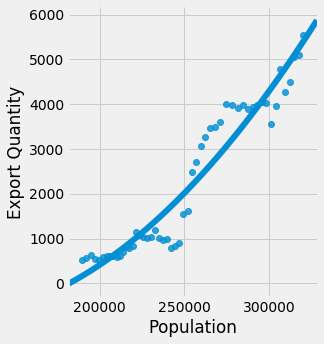

In [621]:
# Checking some points on population and food usage
g = sns.lmplot(x='Population', y='Export Quantity', data=fbs_us_veg, ci=None, order=2)
ax = g.axes[0,0]

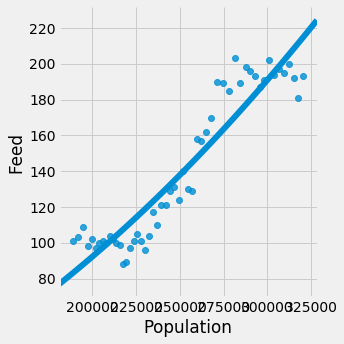

In [622]:
# Checking some points on population and food usage
g = sns.lmplot(x='Population', y='Feed', data=fbs_us_veg, ci=None, order=2)
ax = g.axes[0,0]

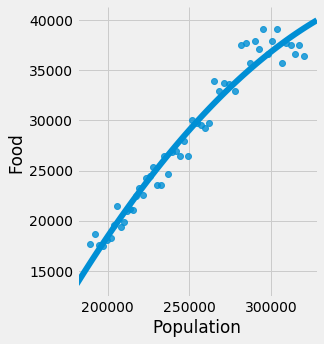

In [623]:
# Checking some points on population and food usage - ISSUE IN US - As the population increases, food supply starts to decrease
g = sns.lmplot(x='Population', y='Food', data=fbs_us_veg, ci=None, order=2)
ax = g.axes[0,0]

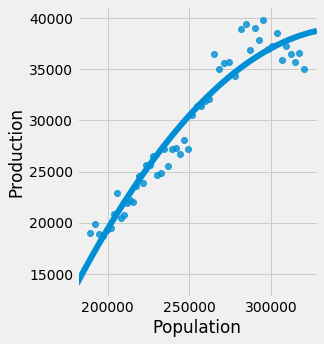

In [624]:
# Checking some points on population and food usage - ISSUE IN US - As the population increases, food production starts to decrease
g = sns.lmplot(x='Population', y='Production', data=fbs_us_veg, ci=None, order=2)
ax = g.axes[0,0]

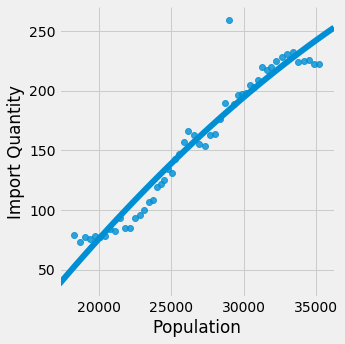

In [631]:
# Checking some points on population and food usage
g = sns.lmplot(x='Population', y='Import Quantity', data=fbs_ca_veg, ci=None, order=2)
ax = g.axes[0,0]

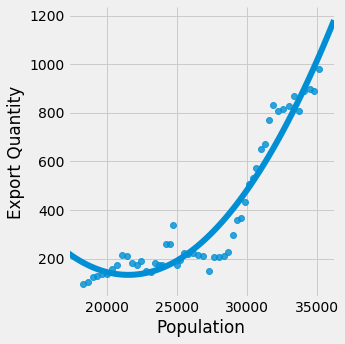

In [635]:
g = sns.lmplot(x='Population', y='Export Quantity', data=fbs_ca_veg, ci=None, order=2)
ax = g.axes[0,0]

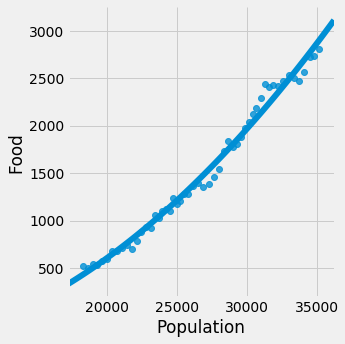

In [636]:
g = sns.lmplot(x='Population', y='Food', data=fbs_ca_veg, ci=None, order=2)
ax = g.axes[0,0]

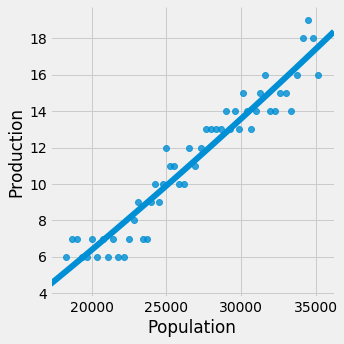

In [637]:
g = sns.lmplot(x='Population', y='Production', data=fbs_ca_veg, ci=None, order=2)
ax = g.axes[0,0]

In [544]:
# first create an array with the same shape as y
# then fill it in the the mean value -- numpy "broadcasts" the sum over the whole array
null_pred = np.zeros(y_veg.shape)
null_pred += np.mean(y_veg)
# then compare predicting the mean every time to the true values
null_mse = metrics.mean_squared_error(null_pred, y_veg)
null_mse

46724152.496262014

In [545]:
# Compute mean squared error using a function from `metrics`.
# r-squared dif in y - more data training data generally goes down
metrics.mean_squared_error(y_veg, y_pred)

881945057.5253148

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X_veg,y_veg, test_size=.25,random_state=123)

In [560]:
lr = LinearRegression()
lr.fit(X_train, y_train) # y_train - actual data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [561]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train) # y_pred_train - predicted data for test set 
print("Training MSE:",metrics.mean_squared_error(y_train, y_pred_train))
print("Test MSE:",metrics.mean_squared_error(y_test, y_pred_test))
# if training set is very different from test data = overfit, high variance
# if scores are high, underfit, high bias

Training MSE: 5799.3066630993135
Test MSE: 11675.776707273511


In [562]:
# null data
null_pred = np.zeros(y_veg.shape)
null_pred += np.mean(y_veg)

In [563]:
# compare predicted mean every time to the true values
null_mse = metrics.mean_squared_error(null_pred, y_veg)
null_mse

46724152.496262014

In [569]:
#Getting a subset of the original data frame for one particular commodity
fbs_poultry_rows = fbs.loc[:,'Item'].isin(["Poultry Meat"])
fbs_us_poultry = fbs.loc[fbs_poultry_rows,:]
fbs_us_poultry.head()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Losses,Production,Stock Variation,Year,Population
9,231,United States of America,2734,Poultry Meat,3132,113,0,3111,0,0,3305,-60,1961,189276
20,231,United States of America,2734,Poultry Meat,3153,123,0,3132,0,0,3232,44,1962,192077
31,231,United States of America,2734,Poultry Meat,3259,96,0,3236,0,0,3366,-11,1963,194751
42,231,United States of America,2734,Poultry Meat,3387,106,0,3363,0,0,3491,2,1964,197288
53,231,United States of America,2734,Poultry Meat,3637,91,0,3611,0,0,3711,17,1965,199686


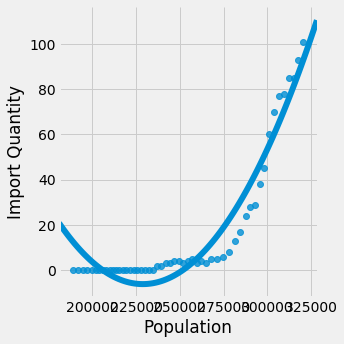

In [571]:
g = sns.lmplot(x='Population', y='Import Quantity', data=fbs_us_poultry, ci=None, order=2)
ax = g.axes[0,0]

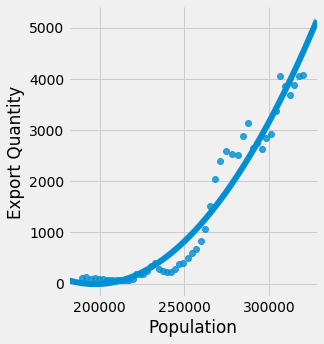

In [572]:
g = sns.lmplot(x='Population', y='Export Quantity', data=fbs_us_poultry, ci=None, order=2)
ax = g.axes[0,0]

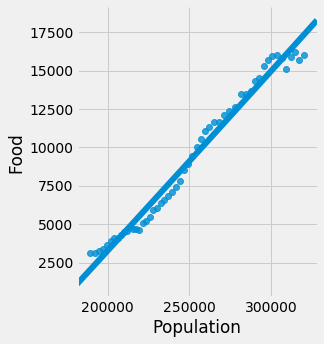

In [573]:
g = sns.lmplot(x='Population', y='Food', data=fbs_us_poultry, ci=None, order=2)
ax = g.axes[0,0]

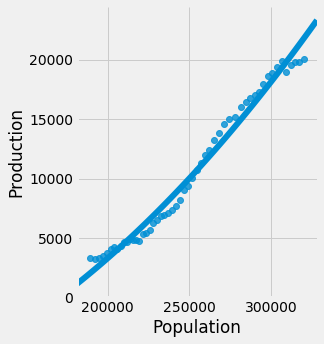

In [574]:
g = sns.lmplot(x='Population', y='Production', data=fbs_us_poultry, ci=None, order=2)
ax = g.axes[0,0]

In [575]:
feature_cols_poultry = ['Population','Food','Export Quantity','Import Quantity']
lr_fbs_poultry = LinearRegression()
X_poultry = fbs_us_poultry.loc[:, feature_cols_poultry]
y_poultry = fbs_us_poultry.loc[:,'Production'] 
lr_fbs_poultry.fit(X_poultry, y_poultry)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [576]:
#Getting a subset of the original data frame for one particular commodity
fbs_bovine_rows = fbs.loc[:,'Item'].isin(["Bovine Meat"])
fbs_us_bovine = fbs.loc[fbs_bovine_rows,:]
fbs_us_bovine.head()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Losses,Production,Stock Variation,Year,Population
0,231,United States of America,2731,Bovine Meat,7802,20,0,7802,408,0,7426,-12,1961,189276
11,231,United States of America,2731,Bovine Meat,7982,18,0,7982,584,0,7411,4,1962,192077
22,231,United States of America,2731,Bovine Meat,8507,19,0,8507,678,0,7886,-39,1963,194751
33,231,United States of America,2731,Bovine Meat,9264,38,0,9264,490,0,8831,-19,1964,197288
44,231,United States of America,2731,Bovine Meat,9384,28,0,9384,429,0,8957,26,1965,199686


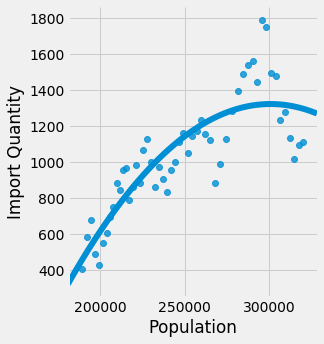

In [577]:
g = sns.lmplot(x='Population', y='Import Quantity', data=fbs_us_bovine, ci=None, order=2)
ax = g.axes[0,0]

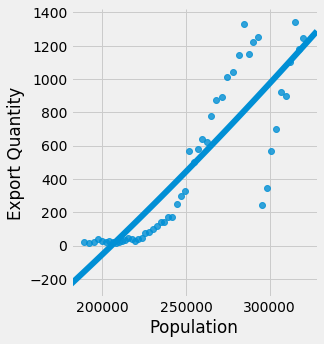

In [578]:
g = sns.lmplot(x='Population', y='Export Quantity', data=fbs_us_bovine, ci=None, order=2)
ax = g.axes[0,0]

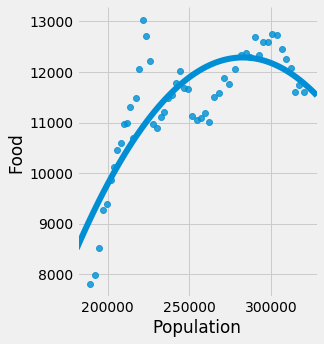

In [579]:
g = sns.lmplot(x='Population', y='Food', data=fbs_us_bovine, ci=None, order=2)
ax = g.axes[0,0]

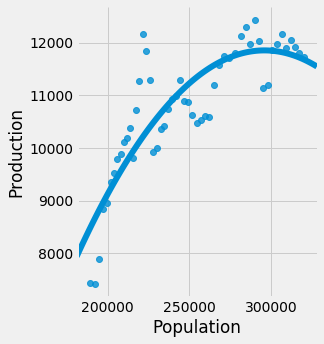

In [580]:
g = sns.lmplot(x='Population', y='Production', data=fbs_us_bovine, ci=None, order=2)
ax = g.axes[0,0]

In [583]:
#Getting a subset of the original data frame for one particular commodity
fbs_pig_rows = fbs.loc[:,'Item'].isin(["Pigmeat"])
fbs_us_pig = fbs.loc[fbs_pig_rows,:]
fbs_us_pig.head()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Export Quantity,Feed,Food,Import Quantity,Losses,Production,Stock Variation,Year,Population
8,231,United States of America,2733,Pigmeat,5241,33,0,5241,101,0,5174,0,1961,189276
19,231,United States of America,2733,Pigmeat,5452,31,0,5452,118,0,5365,0,1962,192077
30,231,United States of America,2733,Pigmeat,5695,65,0,5695,123,0,5637,0,1963,194751
41,231,United States of America,2733,Pigmeat,5729,63,0,5729,123,0,5676,-6,1964,197288
52,231,United States of America,2733,Pigmeat,5187,25,0,5187,153,0,5053,6,1965,199686


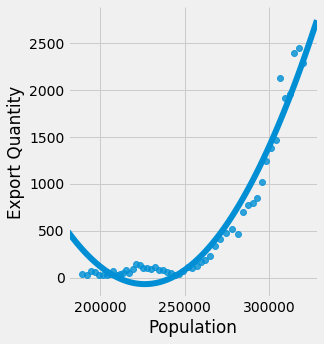

In [588]:
g = sns.lmplot(x="Population", y="Export Quantity", data=fbs_us_pig, ci=None, order=2)
ax = g.axes[0,0]

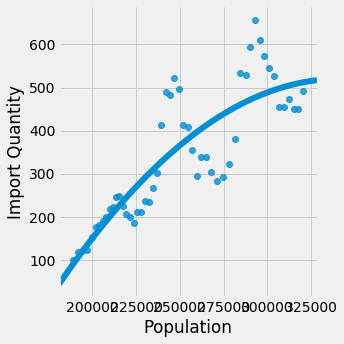

In [589]:
g = sns.lmplot(x="Population", y="Import Quantity", data=fbs_us_pig, ci=None, order=2)
ax = g.axes[0,0]

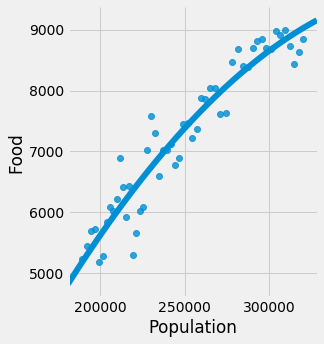

In [590]:
g = sns.lmplot(x="Population", y="Food", data=fbs_us_pig, ci=None, order=2)
ax = g.axes[0,0]

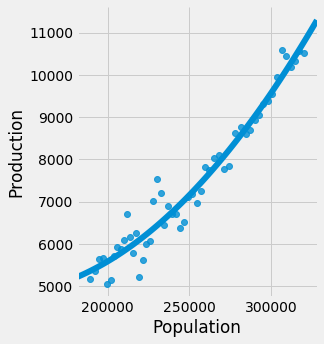

In [591]:
g = sns.lmplot(x="Population", y="Production", data=fbs_us_pig, ci=None, order=2)
ax = g.axes[0,0]

In [ ]:
feature_cols_pig = ['Population','Food','Export Quantity','Import Quantity']
lr_fbs_pig = LinearRegression()
X_pig = fbs_us_pig.loc[:,feature_cols_pig]
y_pig = fbs_us_pig.loc[:,'Production']
lr_fbs_pig.fit(X_pig, y_pig)